In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**In Which Neighborhood Would You Live the Longest? Dailynn Personal Notebook**

**Introduction**

    For my dataset to answer this question, I chose the police incident data from the WRDC Pittsburgh website that dates all the way back from 2016 until now which contained about 600,000 rows of data. Individuals will most likely live longer in areas with the lowest amount of crime.

In [7]:
#First we load our dataset
crime_data = pd.read_csv('pgh_crime1.csv')
crime_data.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


In [8]:
#Check the datatypes
crime_data.dtypes

PK                         int64
CCR                      float64
HIERARCHY                  int64
INCIDENTTIME              object
INCIDENTLOCATION          object
CLEAREDFLAG               object
INCIDENTNEIGHBORHOOD      object
INCIDENTZONE              object
INCIDENTHIERARCHYDESC     object
OFFENSES                  object
INCIDENTTRACT            float64
COUNCIL_DISTRICT         float64
PUBLIC_WORKS_DIVISION    float64
X                        float64
Y                        float64
dtype: object

In [9]:
#Check for missing data
crime_data.isnull().sum()

PK                            0
CCR                           0
HIERARCHY                     0
INCIDENTTIME                  5
INCIDENTLOCATION              0
CLEAREDFLAG                   0
INCIDENTNEIGHBORHOOD       6346
INCIDENTZONE                  1
INCIDENTHIERARCHYDESC    107269
OFFENSES                      0
INCIDENTTRACT              6274
COUNCIL_DISTRICT          41106
PUBLIC_WORKS_DIVISION     41106
X                         28334
Y                         28334
dtype: int64

    Above we checked for missing data. There was a couple categories with missing data but the only two that are fully relevant to the data are INCIDENTNEIGHBORHOOD and INCIDENTHEIRARCHYDESC(which shows the instances of crime commited). Below we drop all the rows with missing data so it does not impact our analysis. Lack of the recorded crime instance, leads to lack of further investigation since the crime was not properly logged anyway. 

    Evaluation of the data where indicent neighborhood is missing conveys that incident location where other rows have street address and zipcode also only have zone information. There are six police zones in pittsburgh and way more neighborhoods than police zones. Thus, there is no way to figure out which neighborhoods correspond to which zone for the empty incident neighborhood rows. 

In [5]:
#Drop the missing rows
crime_data.dropna()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313265,3381108,23032328.0,6,2023-03-03T19:26:00,"1000 Block Brookline BL Pittsburgh, PA 15226",N,Brookline,6,THEFT FROM COIN OPERATED MACH,903 Criminal Conspiracy. / 3921(a) Theft by Un...,1919.0,4.0,5.0,-80.017704,40.392120
313269,3381118,23032340.0,26,2023-03-03T19:41:00,"900 Block Stanhope ST Pittsburgh, PA 15204",N,Sheraden,6,PROTECTIVE ORDERS,9093 Indirect Criminal Contempt,2022.0,2.0,5.0,-80.062244,40.457561
313272,3381122,23032348.0,10,2023-03-03T19:56:00,"2500 Block Bedford AV Pittsburgh, PA 15219",N,Bedford Dwellings,2,SIMPLE ASSAULT/INJURY,2701 Simple Assault. / 3928 Unauthorized Use o...,509.0,6.0,3.0,-79.972833,40.450445
313275,3381126,23032365.0,26,2023-03-03T20:37:00,"Brighton RD & Woods Run AV Pittsburgh, PA 15212",Y,Brighton Heights,1,FALSE RPT LAW ENFORCE AUTH,3334 Turning Movements and Required Signals. /...,2703.0,1.0,1.0,-80.031722,40.476497


In [6]:
#Amount of instances of each recorded crime
crime_data['INCIDENTHIERARCHYDESC'].value_counts()

INCIDENTHIERARCHYDESC
THEFT FROM AUTO                   16641
THEFT/ALL OTHERS                  14531
SIMPLE ASSAULT/INJURY             12028
CRIMINAL MISCHIEF (AUTO)          10891
RETAIL THEFT (SHOPLIFTING)         8265
                                  ...  
USE CARTS/TRAYS/BASKETS/CO NT         1
ASSAULT BY LIFE PRISON/KNIFE          1
UNAUTHORIZED USE VEHICLE/OTHER        1
ETHNIC INT - PHYSICAL/MENTAL          1
EMBEZZLEMENT - OTHER                  1
Name: count, Length: 313, dtype: int64

Unrelated to the problem and just for fun here we can see the most commited crime in pittsburgh is Theft From Cars. So lock your cars.

In [10]:
#Amount of recorded crimes in each neighborhood
crime_data['INCIDENTNEIGHBORHOOD'].value_counts()

INCIDENTNEIGHBORHOOD
South Side Flats             17661
Central Business District    17413
Carrick                      10959
Bloomfield                    8164
Shadyside                     8051
                             ...  
Ridgemont                      282
Troy Hill-Herrs Island         252
Outside County                 226
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                 94
Name: count, Length: 98, dtype: int64

In [11]:
#Combine the Mt. Oliver duplicated due to human input
crime_data['INCIDENTNEIGHBORHOOD'] = crime_data['INCIDENTNEIGHBORHOOD'].replace('Mt. Oliver Boro','Mt. Oliver Neighborhood')

In [12]:
#Delete rows that are from Outside State and Outside County because they are not in the pittsburgh neighborhoods
crime = crime_data[crime_data['INCIDENTNEIGHBORHOOD'].str.contains("Outside County|Outside State")== False]

#Here we are dropping irrelevant crimes or NA
crime_updated = crime[crime['INCIDENTHIERARCHYDESC'].str.contains("NA|99|FOUND PROPERTY|PUBLIC DRUNKENESS|CREDIT CARDS|MISCELLANEOUS INVESTIGATION|LOST PROPERTY|BAD CHECKS")== False]

In [13]:
#Show the cleaned up instances
data_frame = crime_updated['INCIDENTNEIGHBORHOOD'].value_counts().sort_values().head(20)
data_frame

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood    126
Ridgemont                  135
Troy Hill-Herrs Island     141
Chartiers City             165
New Homestead              169
East Carnegie              197
Swisshelm Park             227
Hays                       228
Mount Oliver               257
Summer Hill                286
Oakwood                    299
Esplen                     318
Arlington Heights          331
Regent Square              340
St. Clair                  362
West End                   373
Glen Hazel                 390
Fairywood                  393
South Shore                451
Spring Garden              457
Name: count, dtype: int64

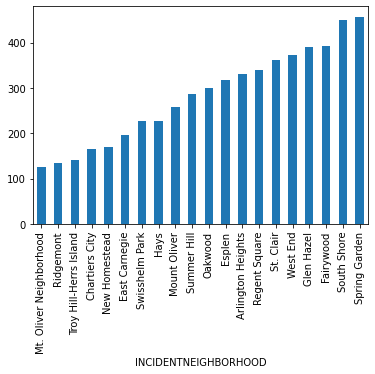

In [54]:
data_frame.head(35).plot.bar()

    The graph above shows our data ploted from least to greatest after our data is cleaned and instances are counted for each neighborhood. 

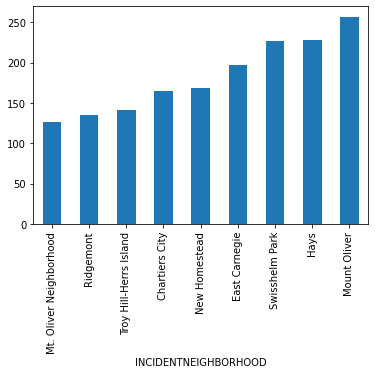

In [55]:
data_frame.head(9).plot.bar()

**Conclusion**

    The graph above shows the top 10 safest neighborhoods by lowest amount of reported crime for better visualization. Mt. Oliver, Ridgemont and Troy Hill-Herrs are in the top 3 respectively.